In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

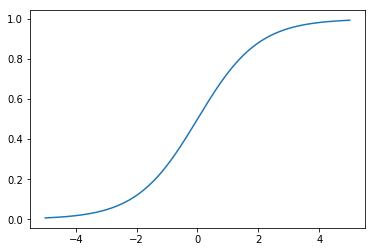

In [2]:
X = np.linspace(-5,5,200)
y = [1/(1+math.e**(-x)) for x in X]
plt.plot(X,y)
plt.show()

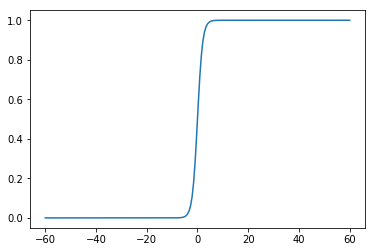

In [3]:
X = np.linspace(-60,60,200)
y = [1/(1+math.e**(-x)) for x in X]
plt.plot(X,y)
plt.show()

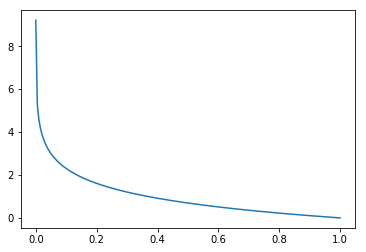

In [4]:
X = np.linspace(0.0001,1,200)
y = [(-np.log(x)) for x in X]
plt.plot(X,y)
plt.show()

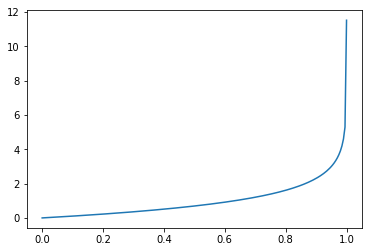

In [5]:
X = np.linspace(0,0.99999,200)
y = [(-np.log(1-x)) for x in X]
plt.plot(X,y)
plt.show()

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
dataSet = pd.read_table('testSet.txt',header = None)
dataSet.columns =['X1','X2','labels']
dataSet.head()

,X1,X2,labels
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [118]:
dataSet.shape

(100, 3)

In [119]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
X1        100 non-null float64
X2        100 non-null float64
labels    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [120]:
dataSet['labels'].value_counts()

1    53
0    47
Name: labels, dtype: int64

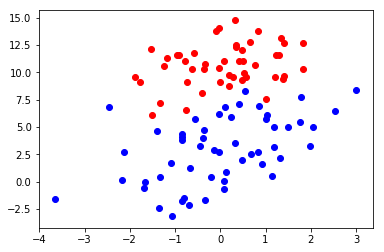

In [125]:
plt.figure()
plt.scatter(dataSet[dataSet['labels']==0]['X1'],dataSet[dataSet['labels']==0]['X2'],c='red')
plt.scatter(dataSet[dataSet['labels']==1]['X1'],dataSet[dataSet['labels']==1]['X2'],c='blue')
plt.show()

In [124]:
dataSet[dataSet['labels']==0]['X1']

0    -0.017612
2    -0.752157
3    -1.322371
4     0.423363
6     0.667394
8     0.569411
9    -0.026632
11    1.347183
13   -1.781871
22   -0.576525
25    1.217916
26   -0.733928
29    1.416614
32    1.224863
35    0.275221
36    0.470575
37   -1.889567
38   -1.527893
39   -1.185247
42   -0.618787
45   -1.237728
48   -0.959885
49    0.492911
50    0.184992
51   -0.355715
52   -0.397822
53    0.824839
56   -0.344008
58   -0.918801
62   -0.007194
63    0.356107
64    0.342578
67    1.296683
68    0.475487
69   -0.783277
70    0.074798
72   -0.102781
74    0.518389
75    1.015399
80   -1.510047
82    1.821096
87    1.400102
91    1.825662
92    0.197445
96    0.761349
98    1.388610
99    0.317029
Name: X1, dtype: float64

In [126]:
def sigmoid(inX):
    s = 1/(1+np.exp(-inX))
    return s

In [127]:
sigmoid(0)

0.5

In [128]:
sigmoid(-5)

0.0066928509242848554

In [129]:
sigmoid(6)

0.9975273768433653

In [130]:
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat,axis = 0)
    inVar = np.std(inMat,axis = 0)
    inMat = (inMat - inMeans)/inVar
    return inMat

In [131]:
def BGD_LR(dataSet,alpha=0.001,maxCycles=500):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    xMat = regularize(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(maxCycles):
        grad = xMat.T*(xMat * weights-yMat)/m
        weights = weights -alpha*grad
    return weights

In [132]:
dataSet.head()

,X1,X2,labels
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [145]:
xMat=np.mat(dataSet.iloc[:,:-1].values)
# xMat

In [142]:
yMat=np.mat(dataSet.iloc[:,-1].values).T

In [146]:
xMat = regularize(xMat)
# xMat

In [147]:
m,n = xMat.shape

In [148]:
m

100

In [149]:
n

2

In [160]:
weights=np.zeros((n,1))
weights

array([[0.],
       [0.]])

In [154]:
xMat

matrix([[-0.04089773,  1.61780723],
        [-1.22428716, -0.41404371],
        [-0.6716952 , -0.00811181],
        [-1.16137187,  0.12479132],
        [ 0.33779372,  0.96903874],
        [ 0.32348765,  0.10628758],
        [ 0.54735765,  1.33401046],
        [-2.13845035,  0.0628984 ],
        [ 0.46321382,  0.64319863],
        [-0.04864374,  0.83338746],
        [ 0.70454413,  0.07448061],
        [ 1.13113289,  1.42792651],
        [ 0.98482604, -0.73763333],
        [-1.55597184,  0.54565748],
        [-0.51235152, -0.17896321],
        [ 0.77427711, -1.07896419],
        [-0.04655953, -0.09180404],
        [-0.05707762, -0.84063356],
        [-0.19490508, -1.32678427],
        [ 0.845403  , -0.17779566],
        [ 1.67912018, -0.72387225],
        [-1.48004205, -1.54352569],
        [-0.52086956,  1.12574544],
        [-0.32360049, -1.78612037],
        [-1.850194  , -0.84464013],
        [ 1.02012363,  0.65364077],
        [-0.65604088,  0.54581629],
        [-3.15337608, -1.772

In [153]:
xMat.T

matrix([[-0.04089773, -1.22428716, -0.6716952 , -1.16137187,  0.33779372,
          0.32348765,  0.54735765, -2.13845035,  0.46321382, -0.04864374,
          0.70454413,  1.13113289,  0.98482604, -1.55597184, -0.51235152,
          0.77427711, -0.04655953, -0.05707762, -0.19490508,  0.845403  ,
          1.67912018, -1.48004205, -0.52086956, -0.32360049, -1.850194  ,
          1.02012363, -0.65604088, -3.15337608,  0.24558185,  1.19075742,
         -0.35753179,  0.45248792,  1.02608943, -1.18321184,  1.00182175,
          0.21057538,  0.37833747, -1.6484568 , -1.33786583, -1.04361534,
         -0.40850346,  0.86924474, -0.55716245,  0.96358892,  0.68573815,
         -1.08868389, -0.61279117,  0.17127425, -0.85008359,  0.39751872,
          0.13309037, -0.33124688, -0.36740667,  0.68256504,  1.26861598,
          0.05982015, -0.32119339,  1.50790931, -0.81480231, -0.33836943,
         -0.74860999,  0.39538471, -0.03195118,  0.280037  ,  0.26841884,
         -0.72207518,  2.14755543,  1.

In [155]:
xMat * weights-yMat

matrix([[ 0.],
        [-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [-1.],
        [ 0.],
        [-1.],
        [ 0.],
        [ 0.],
        [-1.],
        [ 0.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.],
        [ 0.],
        [-1.],
        [-1.],
        [-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [-1.],
        [-

In [156]:
grad = xMat.T*(xMat * weights-yMat)/m
grad

matrix([[0.02100178],
        [0.41479125]])

In [158]:
alpha = 1
weights = weights -alpha*grad
weights

matrix([[-0.04200355],
        [-0.8295825 ]])

In [161]:
alpha = 0.001
weights = weights -alpha*grad
weights

matrix([[-2.10017750e-05],
        [-4.14791252e-04]])

In [162]:
ws=BGD_LR(dataSet,alpha=0.001,maxCycles=500)
xMat = np.mat(dataSet.iloc[:, :-1].values)
yMat = np.mat(dataSet.iloc[:, -1].values).T
xMat = regularize(xMat)

In [163]:
xMat * ws

matrix([[-2.64123468e-01],
        [ 6.49184006e-02],
        [-1.33158642e-04],
        [-2.28858688e-02],
        [-1.57419535e-01],
        [-1.66449862e-02],
        [-2.16530275e-01],
        [-1.49041037e-02],
        [-1.03968632e-01],
        [-1.36118789e-01],
        [-1.06273270e-02],
        [-2.30591543e-01],
        [ 1.22521981e-01],
        [-9.24294354e-02],
        [ 2.80963501e-02],
        [ 1.77772270e-01],
        [ 1.48819104e-02],
        [ 1.37072059e-01],
        [ 2.16115466e-01],
        [ 3.08510560e-02],
        [ 1.21782170e-01],
        [ 2.48701086e-01],
        [-1.84857524e-01],
        [ 2.90802395e-01],
        [ 1.33836305e-01],
        [-1.04464790e-01],
        [-9.05032154e-02],
        [ 2.82522520e-01],
        [ 1.08313978e-01],
        [-1.04879201e-01],
        [ 9.05733263e-02],
        [-5.97173032e-02],
        [-1.74737188e-01],
        [ 3.14621708e-01],
        [ 5.95308542e-02],
        [-1.04336279e-01],
        [-9.65156791e-02],
 

In [164]:
(xMat * ws).A

array([[-2.64123468e-01],
       [ 6.49184006e-02],
       [-1.33158642e-04],
       [-2.28858688e-02],
       [-1.57419535e-01],
       [-1.66449862e-02],
       [-2.16530275e-01],
       [-1.49041037e-02],
       [-1.03968632e-01],
       [-1.36118789e-01],
       [-1.06273270e-02],
       [-2.30591543e-01],
       [ 1.22521981e-01],
       [-9.24294354e-02],
       [ 2.80963501e-02],
       [ 1.77772270e-01],
       [ 1.48819104e-02],
       [ 1.37072059e-01],
       [ 2.16115466e-01],
       [ 3.08510560e-02],
       [ 1.21782170e-01],
       [ 2.48701086e-01],
       [-1.84857524e-01],
       [ 2.90802395e-01],
       [ 1.33836305e-01],
       [-1.04464790e-01],
       [-9.05032154e-02],
       [ 2.82522520e-01],
       [ 1.08313978e-01],
       [-1.04879201e-01],
       [ 9.05733263e-02],
       [-5.97173032e-02],
       [-1.74737188e-01],
       [ 3.14621708e-01],
       [ 5.95308542e-02],
       [-1.04336279e-01],
       [-9.65156791e-02],
       [-1.08334128e-01],
       [-1.9

In [165]:
(xMat * ws).A.flatten()

array([-2.64123468e-01,  6.49184006e-02, -1.33158642e-04, -2.28858688e-02,
       -1.57419535e-01, -1.66449862e-02, -2.16530275e-01, -1.49041037e-02,
       -1.03968632e-01, -1.36118789e-01, -1.06273270e-02, -2.30591543e-01,
        1.22521981e-01, -9.24294354e-02,  2.80963501e-02,  1.77772270e-01,
        1.48819104e-02,  1.37072059e-01,  2.16115466e-01,  3.08510560e-02,
        1.21782170e-01,  2.48701086e-01, -1.84857524e-01,  2.90802395e-01,
        1.33836305e-01, -1.04464790e-01, -9.05032154e-02,  2.82522520e-01,
        1.08313978e-01, -1.04879201e-01,  9.05733263e-02, -5.97173032e-02,
       -1.74737188e-01,  3.14621708e-01,  5.95308542e-02, -1.04336279e-01,
       -9.65156791e-02, -1.08334128e-01, -1.99754139e-01, -1.69408277e-01,
        1.14898853e-01,  1.85164766e-02, -1.33451948e-01,  2.14945252e-01,
        1.39211067e-01, -1.42657986e-01,  3.07386529e-01,  2.34723999e-02,
       -1.77676134e-01, -1.55123412e-01, -7.54713409e-02, -1.33138102e-01,
       -5.31411965e-02, -

In [166]:
p = sigmoid(xMat * ws).A.flatten()
p

array([0.43435034, 0.5162239 , 0.49996671, 0.49427878, 0.46072619,
       0.49583885, 0.44607795, 0.49627404, 0.47403123, 0.46602275,
       0.49734319, 0.4426062 , 0.53059223, 0.47690908, 0.50702363,
       0.54432639, 0.50372041, 0.53421446, 0.55381956, 0.50771215,
       0.53040797, 0.56185677, 0.45391678, 0.57219256, 0.53340922,
       0.47390753, 0.47738963, 0.57016454, 0.52705205, 0.47380421,
       0.52262786, 0.48507511, 0.45642652, 0.57801296, 0.51487832,
       0.47393957, 0.47588979, 0.47294293, 0.45022686, 0.45774893,
       0.52869315, 0.50462899, 0.46668644, 0.55353037, 0.53474667,
       0.46439587, 0.57624721, 0.50586783, 0.45569745, 0.46129673,
       0.48114112, 0.46676455, 0.48671783, 0.43753854, 0.51435237,
       0.49773949, 0.46333053, 0.49073218, 0.45567368, 0.51595634,
       0.52127251, 0.5408706 , 0.47792912, 0.44849766, 0.44994793,
       0.57014101, 0.50204134, 0.45628274, 0.45211755, 0.46056212,
       0.46083709, 0.5530835 , 0.43682395, 0.53254714, 0.47103

In [167]:
for i, j in enumerate(p):
    print(i,j)

0 0.4343503399545477
1 0.5162239027126511
2 0.49996671033965095
3 0.4942787825141549
4 0.4607261861802238
5 0.49583884951452345
6 0.44607794640429443
7 0.49627404304760064
8 0.4740312301520408
9 0.46602274841968117
10 0.49734319325745885
11 0.4426062033008217
12 0.5305922348001393
13 0.47690907801389276
14 0.507023625484549
15 0.5443263917410155
16 0.5037204089439443
17 0.5342144608649806
18 0.5538195551041175
19 0.5077121523094346
20 0.5304079704243817
21 0.5618567680142235
22 0.4539167750480068
23 0.5721925611010378
24 0.5334092218596722
25 0.4739075269393147
26 0.4773896272010265
27 0.5701645446120276
28 0.527052051959521
29 0.47380420732578743
30 0.5226278646529326
31 0.4850751093092062
32 0.4564265160305424
33 0.5780129648431844
34 0.5148783198308096
35 0.473939567341348
36 0.4758897934118311
37 0.4729429253760553
38 0.45022685821371716
39 0.45774893009944734
40 0.5286931535969168
41 0.5046289869041503
42 0.4666864396911607
43 0.5535303730051121
44 0.5347466697795863
45 0.46439586

In [168]:
for i, j in enumerate(p):
    if j < 0.5:
        p[i] = 0
    else:
        p[i] = 1

In [169]:
p

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.])

In [170]:
train_error = (np.fabs(yMat.A.flatten() - p)).sum()
train_error

8.0

In [171]:
train_error_rate = train_error / yMat.shape[0]
train_error_rate

0.08

In [172]:
def logisticAcc(dataSet, method, alpha=0.01, maxCycles=500):
    weights = method(dataSet,alpha=alpha,maxCycles=maxCycles)
    p = sigmoid(xMat * ws).A.flatten()
    for i, j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    train_error = (np.fabs(yMat.A.flatten() - p)).sum()
    trainAcc = 1 - train_error / yMat.shape[0]
    return trainAcc

In [173]:
logisticAcc(dataSet, BGD_LR, alpha=0.001, maxCycles=500)

0.92

In [181]:
def SGD_LR(dataSet,alpha=0.001,maxCycles=500):
    dataSet = dataSet.sample(maxCycles, replace=True)
    dataSet.index = range(dataSet.shape[0])
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    m, n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(m):
        grad = xMat[i].T * (xMat[i] * weights - yMat[i])
        weights = weights - alpha * grad
    return weights

In [182]:
SGD_LR(dataSet,alpha=0.001,maxCycles=500)

matrix([[ 0.02964685],
        [-0.16487118]])

In [175]:
dataSet.shape

(100, 3)

In [176]:
maxCycles=500
dataSet = dataSet.sample(maxCycles, replace=True)

In [177]:
dataSet.shape

(500, 3)

In [179]:
dataSet.index=range(dataSet.shape[0])

In [183]:
dataSet.head()

,X1,X2,labels
0,0.824839,13.730343,0
1,0.423363,11.054677,0
2,0.126117,0.922311,1
3,-0.851633,4.375691,1
4,-1.527893,12.150579,0


In [184]:
logisticAcc(dataSet, SGD_LR, alpha=0.001, maxCycles=500)

0.92

In [186]:
train = pd.read_table('horseColicTraining.txt',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,0.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,0.0


In [187]:
train.shape

(299, 22)

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 22 columns):
0     299 non-null float64
1     299 non-null float64
2     299 non-null float64
3     299 non-null float64
4     299 non-null float64
5     299 non-null float64
6     299 non-null float64
7     299 non-null float64
8     299 non-null float64
9     299 non-null float64
10    299 non-null float64
11    299 non-null float64
12    299 non-null float64
13    299 non-null float64
14    299 non-null float64
15    299 non-null float64
16    299 non-null float64
17    299 non-null float64
18    299 non-null float64
19    299 non-null float64
20    299 non-null float64
21    299 non-null float64
dtypes: float64(22)
memory usage: 51.5 KB


In [190]:
test = pd.read_table('horseColicTest.txt',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,1,0.0,3,5,45.0,70.0,3,2.0,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,1,0.0,0,0,35.0,61.0,3,2.0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,2,37.0,5.8,0,0.0,1


In [191]:
test.shape

(67, 22)

In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 22 columns):
0     67 non-null int64
1     67 non-null int64
2     67 non-null float64
3     67 non-null int64
4     67 non-null int64
5     67 non-null int64
6     67 non-null int64
7     67 non-null int64
8     67 non-null int64
9     67 non-null int64
10    67 non-null int64
11    67 non-null int64
12    67 non-null int64
13    67 non-null int64
14    67 non-null float64
15    67 non-null int64
16    67 non-null int64
17    67 non-null float64
18    67 non-null float64
19    67 non-null int64
20    67 non-null float64
21    67 non-null int64
dtypes: float64(5), int64(17)
memory usage: 11.6 KB


In [193]:
def classify(inX,weights):
    p = sigmoid(sum(inX * weights))
    if p < 0.5:
        return 0
    else:
        return 1

In [200]:
def get_acc(train,test,alpha=0.001, maxCycles=5000):
    weights = SGD_LR(train,alpha=alpha,maxCycles=maxCycles)
    xMat = np.mat(test.iloc[:, :-1].values)
    xMat = regularize(xMat)
    result = []
    for inX in xMat:
        label = classify(inX,weights)
        result.append(label)
    retest=test.copy()
    retest['predict']=result
    acc = (retest.iloc[:,-1]==retest.iloc[:,-2]).mean()
    print(f'模型准确率为：{acc}')
    return retest

In [194]:
weights = SGD_LR(train,alpha=alpha,maxCycles=maxCycles)
weights

matrix([[ 1.70589540e-02],
        [-5.94110319e-03],
        [ 3.73923303e-02],
        [-2.50998630e-02],
        [ 3.89260844e-03],
        [-2.47010109e-02],
        [-3.56396482e-02],
        [-4.42635668e-02],
        [-1.15039541e-02],
        [-3.01530470e-02],
        [-1.22285437e-03],
        [-1.39729211e-02],
        [ 1.06991538e-02],
        [-2.01668782e-02],
        [-2.11719318e-02],
        [-2.07559549e-05],
        [-1.28706826e-02],
        [-9.03005514e-03],
        [ 1.93278361e-02],
        [-2.52366474e-02],
        [-2.22214790e-02]])

In [195]:
xMat = np.mat(test.iloc[:, :-1].values)
xMat

matrix([[ 2. ,  1. , 38.5, ...,  6.3,  0. ,  0. ],
        [ 2. ,  1. , 37.6, ...,  6.3,  1. ,  5. ],
        [ 1. ,  1. , 37.7, ..., 70. ,  3. ,  2. ],
        ...,
        [ 1. ,  1. , 38. , ..., 65. ,  3. ,  2. ],
        [ 2. ,  1. , 38. , ...,  5.8,  0. ,  0. ],
        [ 2. ,  1. , 37.6, ...,  6. ,  0. ,  0. ]])

In [196]:
xMat = regularize(xMat)
xMat

matrix([[ 1.01503844, -0.25197632,  0.43222865, ..., -0.58239206,
         -1.01488142, -0.69405222],
        [ 1.01503844, -0.25197632,  0.36283731, ..., -0.58239206,
         -0.1754116 ,  2.07060287],
        [-0.98518437, -0.25197632,  0.37054746, ...,  1.68032171,
          1.50352803,  0.41180982],
        ...,
        [-0.98518437, -0.25197632,  0.39367791, ...,  1.50271466,
          1.50352803,  0.41180982],
        [ 1.01503844, -0.25197632,  0.39367791, ..., -0.60015277,
         -1.01488142, -0.69405222],
        [ 1.01503844, -0.25197632,  0.36283731, ..., -0.59304848,
         -1.01488142, -0.69405222]])

In [197]:
result = []
for inX in xMat:
    label = classify(inX,weights)
    result.append(label)

In [199]:
print(result)

[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [201]:
get_acc(train,test,alpha=0.001, maxCycles=5000)

模型准确率为：0.7164179104477612


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,predict
0,2,1,38.5,54,20,0,1,2,2,3,...,2,5.9,0,2,42.0,6.3,0,0.0,1,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0.0,0,0,44.0,6.3,1,5.0,1,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,0.0,3,5,45.0,70.0,3,2.0,1,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,0.0,0,0,35.0,61.0,3,2.0,0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0.0,0,2,37.0,5.8,0,0.0,1,0
5,1,1,0.0,60,40,3,0,1,1,0,...,2,0.0,0,5,42.0,72.0,0,0.0,1,1
6,2,1,38.4,80,60,3,2,2,1,3,...,2,0.0,1,1,54.0,6.9,0,0.0,1,1
7,2,1,37.8,48,12,2,1,2,1,3,...,0,0.0,2,0,48.0,7.3,1,0.0,1,1
8,2,1,37.9,45,36,3,3,3,2,2,...,1,0.0,3,0,33.0,5.7,3,0.0,1,1
9,2,1,39.0,84,12,3,1,5,1,2,...,2,7.0,0,4,62.0,5.9,2,2.2,0,0


In [202]:
for i in range(10):
    acc =get_acc(train,test,alpha=0.001, maxCycles=5000)

模型准确率为：0.7313432835820896
模型准确率为：0.7313432835820896
模型准确率为：0.7313432835820896
模型准确率为：0.7164179104477612
模型准确率为：0.7611940298507462
模型准确率为：0.7313432835820896
模型准确率为：0.7014925373134329
模型准确率为：0.7164179104477612
模型准确率为：0.7611940298507462
模型准确率为：0.746268656716418


In [204]:
#导入数据集，这里需要注意分隔符为分号“;”
bankSet = pd.read_csv('bank-full.csv',sep=';')
bankSet.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [205]:
bankSet.shape

(45211, 17)

In [206]:
bankSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [208]:
bankSet.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [217]:
# bankSet['campaign'].value_counts()

In [215]:
# bankSet['duration'].value_counts()

In [213]:
# bankSet['balance'].value_counts()

In [211]:
# bankSet['age'].value_counts()

In [209]:
#将连续型变量分箱编码为分类变量
from sklearn.preprocessing import KBinsDiscretizer

In [218]:
#将age/duration/day字段编码为三分类变量
est1 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [220]:
X1=bankSet.loc[:,['age','duration','day']]
X1.head()

,age,duration,day
0,58,261,5
1,44,151,5
2,33,76,5
3,47,92,5
4,33,198,5


In [221]:
est1.fit_transform(X1)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [2., 2., 1.],
       [1., 1., 1.],
       [0., 1., 1.]])

In [222]:
bankSet.loc[:,['age','duration','day']]=est1.fit_transform(X1)

In [224]:
bankSet.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,management,married,tertiary,no,2143,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
1,1.0,technician,single,secondary,no,29,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
2,0.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,0.0,may,0.0,1,-1,0,unknown,no
3,1.0,blue-collar,married,unknown,no,1506,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
4,0.0,unknown,single,unknown,no,1,no,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
5,0.0,management,married,tertiary,no,231,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
6,0.0,management,single,tertiary,no,447,yes,yes,unknown,0.0,may,0.0,1,-1,0,unknown,no
7,0.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,0.0,may,1.0,1,-1,0,unknown,no
8,1.0,retired,married,primary,no,121,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no
9,1.0,technician,single,secondary,no,593,yes,no,unknown,0.0,may,0.0,1,-1,0,unknown,no


In [225]:
bankSet['day'].value_counts()

1.0    18936
0.0    15204
2.0    11071
Name: day, dtype: int64

In [226]:
bankSet['age'].value_counts()

0.0    27250
1.0    16773
2.0     1188
Name: age, dtype: int64

In [227]:
bankSet['duration'].value_counts()

0.0    33331
1.0    10000
2.0     1880
Name: duration, dtype: int64

In [228]:
#将balance/campaign/pdays/previous字段编码为二分类变量
est2 = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')
X2=bankSet.loc[:,['balance','campaign','pdays','previous']]
bankSet.loc[:,['balance','campaign','pdays','previous']]=est2.fit_transform(X2)

In [229]:
bankSet.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,management,married,tertiary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
1,1.0,technician,single,secondary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
2,0.0,entrepreneur,married,secondary,no,0.0,yes,yes,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
3,1.0,blue-collar,married,unknown,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
4,0.0,unknown,single,unknown,no,0.0,no,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
5,0.0,management,married,tertiary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
6,0.0,management,single,tertiary,no,0.0,yes,yes,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
7,0.0,entrepreneur,divorced,tertiary,yes,0.0,yes,no,unknown,0.0,may,1.0,0.0,0.0,0.0,unknown,no
8,1.0,retired,married,primary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no
9,1.0,technician,single,secondary,no,0.0,yes,no,unknown,0.0,may,0.0,0.0,0.0,0.0,unknown,no


In [230]:
bankSet['balance'].value_counts()

0.0    43372
1.0     1839
Name: balance, dtype: int64

In [232]:
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder().fit_transform(bankSet)

array([[1., 4., 1., ..., 0., 3., 0.],
       [1., 9., 2., ..., 0., 3., 0.],
       [0., 2., 1., ..., 0., 3., 0.],
       ...,
       [2., 5., 1., ..., 0., 2., 1.],
       [1., 1., 1., ..., 0., 3., 0.],
       [0., 2., 1., ..., 0., 1., 0.]])

In [234]:
#将分类特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder
bankSet.iloc[:,:] = OrdinalEncoder().fit_transform(bankSet)
bankSet.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
2,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
3,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,11.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
5,0.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
6,0.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
7,0.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,8.0,1.0,0.0,0.0,0.0,3.0,0.0
8,1.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0
9,1.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0


In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bankSet.iloc[:,:-1]
                                                 ,bankSet.iloc[:,-1]
                                                 ,test_size=0.25
                                                 ,random_state=0
                                                )

In [237]:
x_train.shape

(33908, 16)

In [238]:
x_test.shape

(11303, 16)

In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
classifier = LogisticRegression(random_state = 0)

In [242]:
classifier.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [243]:
y_pred = classifier.predict(x_test)
y_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [244]:
from sklearn.metrics import accuracy_score

In [245]:
accuracy_score(y_test,y_pred)

0.8887021144828806

In [248]:
#导入数据
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [250]:
dataset.shape

(400, 5)

In [251]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [252]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [253]:
#这里只需要处理性别这一个特征，所以用LabelEncoder，因为它允许输入一维数据
from sklearn.preprocessing import LabelEncoder
dataset.loc[:,'Gender']=LabelEncoder().fit_transform(dataset.loc[:,'Gender'])

In [254]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [255]:
#提取出特征矩阵和标签
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [256]:
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [257]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [258]:
#切分训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y
                                                 ,test_size=0.25
                                                 ,random_state=0
                                                )

In [260]:
x_train[:10]

array([[     0,     44,  39000],
       [     1,     32, 120000],
       [     0,     38,  50000],
       [     0,     32, 135000],
       [     0,     52,  21000],
       [     0,     53, 104000],
       [     1,     39,  42000],
       [     1,     38,  61000],
       [     0,     36,  50000],
       [     0,     36,  63000]], dtype=int64)

In [261]:
x_test[:10]

array([[     1,     30,  87000],
       [     0,     38,  50000],
       [     1,     35,  75000],
       [     0,     30,  79000],
       [     0,     35,  50000],
       [     1,     27,  20000],
       [     0,     31,  15000],
       [     1,     36, 144000],
       [     0,     18,  68000],
       [     1,     47,  43000]], dtype=int64)

In [263]:
len(y_train)

300

In [264]:
len(y_test)

100

In [265]:
#数据标准化（StandardScaler作用：针对每一个特征维度去均值和方差归一化）
from sklearn.preprocessing import StandardScaler

In [266]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [267]:
x_train[:10]

array([[-0.98019606,  0.58164944, -0.88670699],
       [ 1.02020406, -0.60673761,  1.46173768],
       [-0.98019606, -0.01254409, -0.5677824 ],
       [-0.98019606, -0.60673761,  1.89663484],
       [-0.98019606,  1.37390747, -1.40858358],
       [-0.98019606,  1.47293972,  0.99784738],
       [ 1.02020406,  0.08648817, -0.79972756],
       [ 1.02020406, -0.01254409, -0.24885782],
       [-0.98019606, -0.21060859, -0.5677824 ],
       [-0.98019606, -0.21060859, -0.19087153]])

In [268]:
x_test[:10]

array([[ 1.02020406, -0.54748976,  0.5130727 ],
       [-0.98019606,  0.15442019, -0.61825566],
       [ 1.02020406, -0.10879604,  0.14615539],
       [-0.98019606, -0.54748976,  0.26846116],
       [-0.98019606, -0.10879604, -0.61825566],
       [ 1.02020406, -0.81070599, -1.53554892],
       [-0.98019606, -0.45975102, -1.68843113],
       [ 1.02020406, -0.0210573 ,  2.25592989],
       [-0.98019606, -1.60035469, -0.0678797 ],
       [ 1.02020406,  0.94406888, -0.83229075]])

In [269]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


83.33

In [272]:
a = logreg.score(x_train, y_train)
a

0.8333333333333334

In [274]:
round(a*100,2)

83.33

In [275]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

91.67

In [276]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

89.0

In [277]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [278]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [279]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Naive Bayes', 'Random Forest',
              'Decision Tree'],
    'Score': [ acc_log,acc_knn, acc_gaussian,
              acc_random_forest,acc_decision_tree]})

In [280]:
models

,Model,Score
0,Logistic Regression,83.33
1,KNN,91.67
2,Naive Bayes,89.00
3,Random Forest,100.00
4,Decision Tree,100.00


In [281]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
4,Decision Tree,100.00
1,KNN,91.67
2,Naive Bayes,89.00
0,Logistic Regression,83.33
